# About

[Date set link](https://www.kaggle.com/c/titanic/data)     
[Tutorial link](https://corpocrat.com/2014/08/29/tutorial-titanic-dataset-machine-learning-for-kaggle/)

### Imports

In [1]:
import time
import collections
import warnings

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import custom_module as mod

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble

from IPython.display import display, Markdown, Latex


warnings.filterwarnings("ignore")
%matplotlib inline

### Date definition

|  Variable |  Definition | Key  | 
|---|---|---|
| survival  |   Survival|  0 = No, 1 = Yes |
|  pclass |  Ticket class |  1 = 1st, 2 = 2nd, 3 = 3rd |
|  sex |  Sex | Sex  |
|  Age |  Age in years | Age in years |
|  sibsp |  # of siblings / spouses aboard the Titanic | # of siblings / spouses aboard the Titanic |
|  parch |  # of parents / children aboard the Titanic | # of parents / children aboard the Titanic |
|  ticket |  Ticket number | Ticket number |
|  fare |  Passenger fare | Passenger fare |
|  cabin |  Cabin number |  Cabin number |
|  embarked |  Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [2]:
df = pd.read_csv('raw-data/train.csv', header = 0)

In [3]:
df = mod.changeColumnNames(df)

In [4]:
df.head(25)

,PASSENGER_ID,SURVIVED,TICKET_CLASS,NAME,SEX,AGE,SIBLING_SPOUSE_ON_BOARD,PARENT_CHILDREN_ON_BOARD,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PASSENGER_ID              712 non-null    int64  
 1   SURVIVED                  712 non-null    int64  
 2   AGE                       712 non-null    float64
 3   SIBLING_SPOUSE_ON_BOARD   712 non-null    int64  
 4   PARENT_CHILDREN_ON_BOARD  712 non-null    int64  
 5   FARE                      712 non-null    float64
 6   TICKET_CLASS__1           712 non-null    uint8  
 7   TICKET_CLASS__2           712 non-null    uint8  
 8   TICKET_CLASS__3           712 non-null    uint8  
 9   SEX__female               712 non-null    uint8  
 10  SEX__male                 712 non-null    uint8  
 11  EMBARKED__C               712 non-null    uint8  
 12  EMBARKED__Q               712 non-null    uint8  
 13  EMBARKED__S               712 non-null    uint8  
dtypes: float64

None

In [6]:
cols = ['NAME','TICKET','CABIN']
df = df.drop(cols, axis = 1)

In [7]:
df = mod.process(df)

In [8]:
corr = df.corr()
display(corr)

,PASSENGER_ID,SURVIVED,AGE,SIBLING_SPOUSE_ON_BOARD,PARENT_CHILDREN_ON_BOARD,FARE,TICKET_CLASS__1,TICKET_CLASS__2,TICKET_CLASS__3,SEX__female,SEX__male,EMBARKED__C,EMBARKED__Q,EMBARKED__S
PASSENGER_ID,1.000000,0.029526,0.033681,-0.082704,-0.011672,0.009655,0.035551,-0.003142,-0.028431,-0.024674,0.024674,0.008654,-0.027045,0.004605
SURVIVED,0.029526,1.000000,-0.082446,-0.015523,0.095265,0.266100,0.297908,0.086891,-0.335364,0.536762,-0.536762,0.195673,-0.048966,-0.159015
AGE,0.033681,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.344976,0.009214,-0.309944,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SIBLING_SPOUSE_ON_BOARD,-0.082704,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.036512,-0.052570,0.077060,0.106296,-0.106296,-0.046227,0.051331,0.018968
PARENT_CHILDREN_ON_BOARD,-0.011672,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.013514,-0.018558,0.027750,0.249543,-0.249543,-0.009523,-0.009417,0.013259
FARE,0.009655,0.266100,0.093143,0.139860,0.206624,1.000000,0.596792,-0.140246,-0.402219,0.182457,-0.182457,0.301337,-0.062346,-0.250994
TICKET_CLASS__1,0.035551,0.297908,0.344976,-0.036512,-0.013514,0.596792,1.000000,-0.334442,-0.588670,0.107152,-0.107152,0.335545,-0.086426,-0.271535
TICKET_CLASS__2,-0.003142,0.086891,0.009214,-0.052570,-0.018558,-0.140246,-0.334442,1.000000,-0.564948,0.075347,-0.075347,-0.140605,-0.080929,0.168577
TICKET_CLASS__3,-0.028431,-0.335364,-0.309944,0.077060,0.027750,-0.402219,-0.588670,-0.564948,1.000000,-0.158446,0.158446,-0.173178,0.145087,0.093140
SEX__female,-0.024674,0.536762,-0.099037,0.106296,0.249543,0.182457,0.107152,0.075347,-0.158446,1.000000,-1.000000,0.103611,0.027256,-0.109078


<AxesSubplot:>

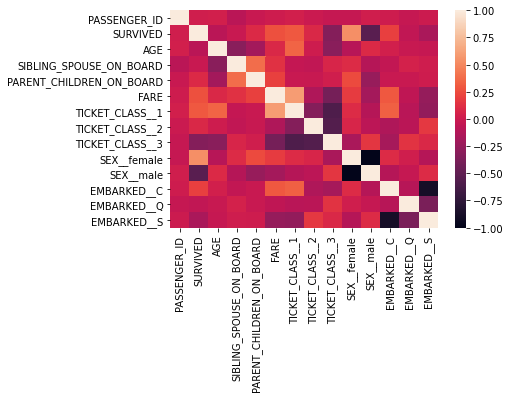

In [9]:
sns.heatmap(corr)

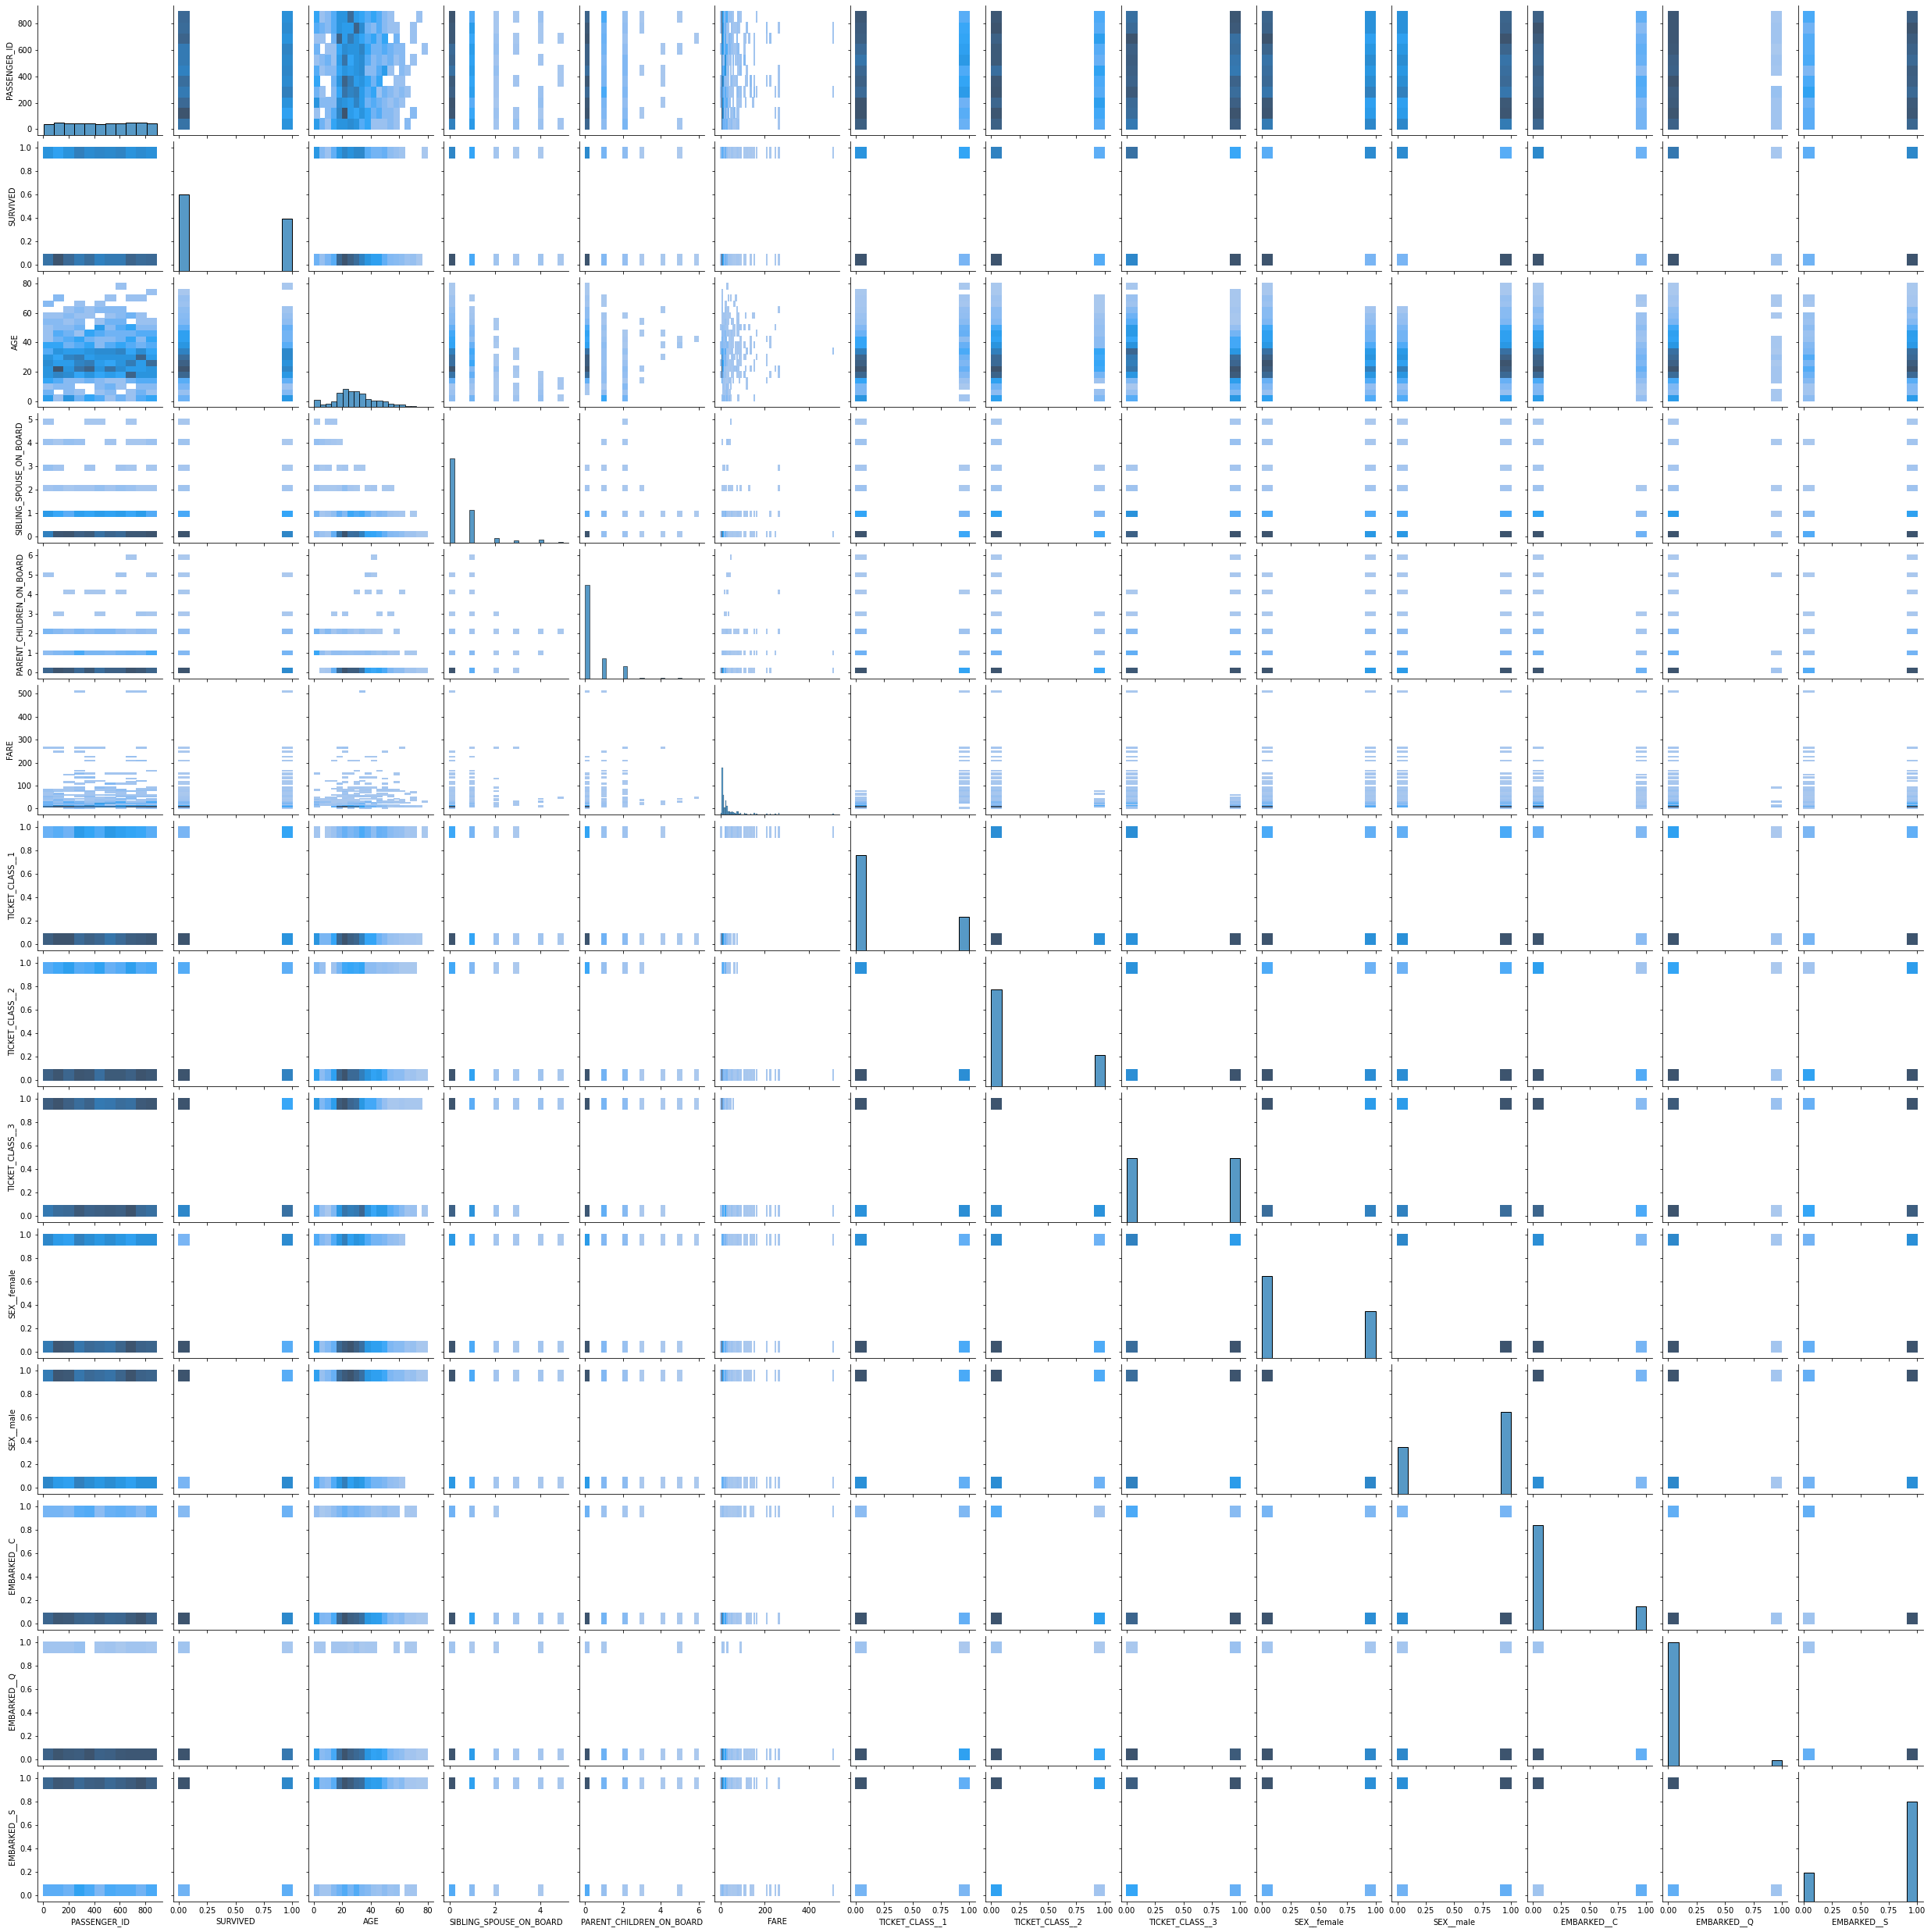

In [10]:
sns.pairplot(df, kind = "hist")

In [11]:
df.head(25)

,PASSENGER_ID,SURVIVED,AGE,SIBLING_SPOUSE_ON_BOARD,PARENT_CHILDREN_ON_BOARD,FARE,TICKET_CLASS__1,TICKET_CLASS__2,TICKET_CLASS__3,SEX__female,SEX__male,EMBARKED__C,EMBARKED__Q,EMBARKED__S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,7,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
7,8,0,2.0,3,1,21.0750,0,0,1,0,1,0,0,1
8,9,1,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1,14.0,1,0,30.0708,0,1,0,1,0,1,0,0
10,11,1,4.0,1,1,16.7000,0,0,1,1,0,0,0,1


In [12]:
X = df.values
y = df['SURVIVED'].values

In [13]:
X = np.delete(X, 1, axis = 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
Score = clf.score(X_test ,y_test)
display(Markdown('[ DecisionTreeClassifier ] Predicition score : '), Score * 100)

[ DecisionTreeClassifier ] Predicition score : 

76.16822429906543

In [16]:
clf = ensemble.RandomForestClassifier(n_estimators = 100)
clf.fit (X_train, y_train)
Score = clf.score (X_test, y_test)
display(Markdown('[ RandomForestClassifier with 100 estimators ] Predicition score : '), Score * 100)

[ RandomForestClassifier with 100 estimators ] Predicition score : 

77.57009345794393

In [17]:
clf = ensemble.GradientBoostingClassifier()
clf.fit (X_train, y_train)
Score = clf.score (X_test, y_test)
display(Markdown('[ GradientBoostingClassifier ] Predicition score : '), Score * 100)

[ GradientBoostingClassifier ] Predicition score : 

80.37383177570094

In [18]:
clf = ensemble.GradientBoostingClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
Score = clf.score(X_test, y_test)
display(Markdown('[ GradientBoostingClassifier with 50 estimators ] Predicition score : '), Score * 100)

[ GradientBoostingClassifier with 50 estimators ] Predicition score : 

80.37383177570094